In [1]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)#test and train division
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking
%matplotlib inline
from pylab import *
df = pd.read_csv('modemp.csv')
X=df[['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                      'YearsWithCurrManager', 'Age', 'OverTime', 'DistanceFromHome', 'StockOptionLevel',
                      'JobLevel', 'JobRole', 'WorkLifeBalance', 'Gender']]
y=df['Attrition']

C:\Users\LOKSUNDAR\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)#test and train division

Text(0.5, 1.0, 'Estimators vs Accuracy')

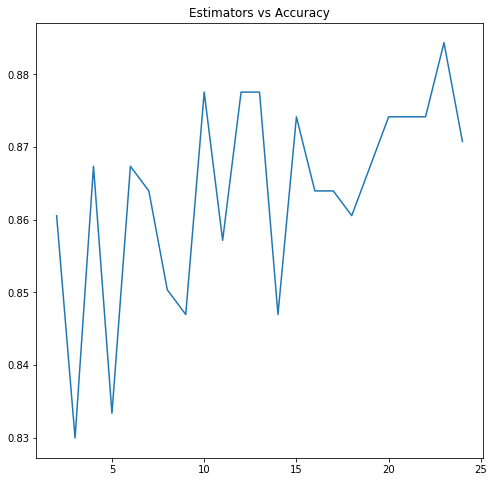

In [5]:
gx = []
gy = []
for i in range(2,25):
    gx.append(i)
    clf = RandomForestClassifier(n_estimators=i)
    clf = clf.fit(X_train,y_train)
    clf.predict(X_test)
    gy.append(clf.score(X_test,y_test))
plt.figure(figsize=(8,8))    
plt.plot(gx,gy)
plt.title("Estimators vs Accuracy")

In [37]:
import time
t1 = time.perf_counter()
clf = RandomForestClassifier(n_estimators=5)
clf = clf.fit(X_train,y_train)
t2=time.perf_counter()
print("elapsed time is :",(t2-t1)*100000)
clf.predict(X_test)
clf.score(X_test,y_test)

elapsed time is : 1093.4299999462382


0.8061224489795918

In [38]:
from sklearn.metrics import classification_report
print(classification_report(clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       266
           1       0.20      0.36      0.26        28

    accuracy                           0.81       294
   macro avg       0.57      0.61      0.57       294
weighted avg       0.86      0.81      0.83       294



In [41]:
def v(a,b):
    r = 2*a*b
    r = r/(a+b)
    print (r)
v(89,26)

40.243478260869566


In [19]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix( clf.predict(X_test),y_test).ravel()
(tn, fp, fn, tp)
p = tp/(tp+fp)
r = tp/(tp+fn)
f = 2*p*r/(p+r)
f

0.4

In [20]:
tp

16

In [21]:
tn

230

In [22]:
fn

8

In [23]:
fp

40